,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


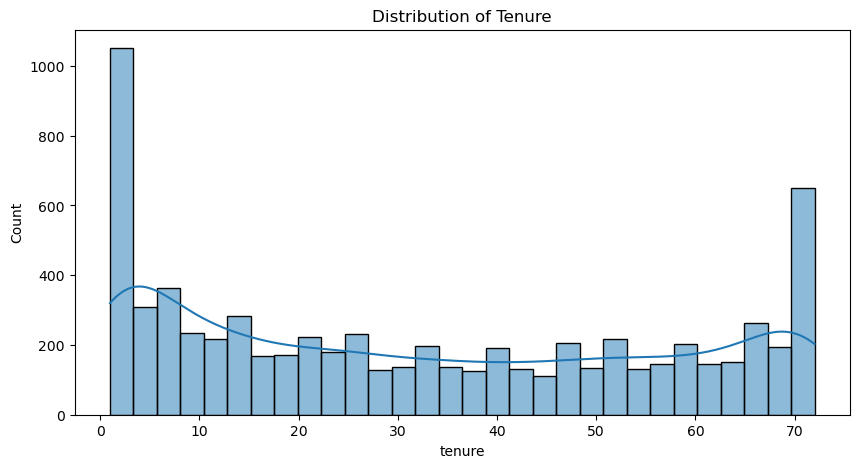

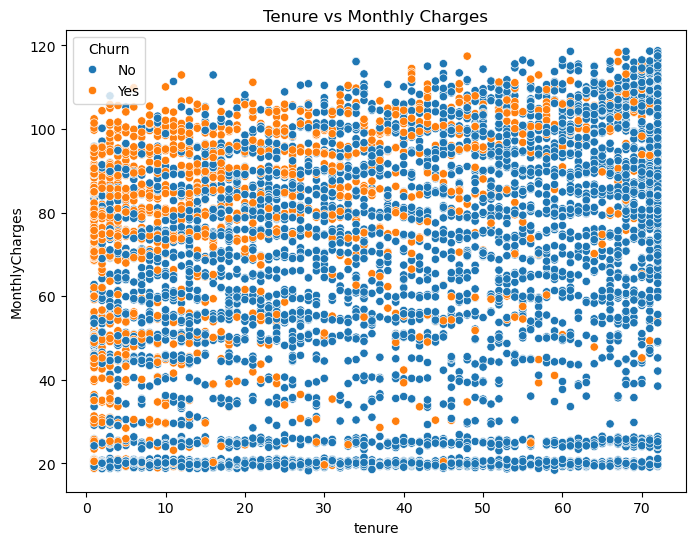

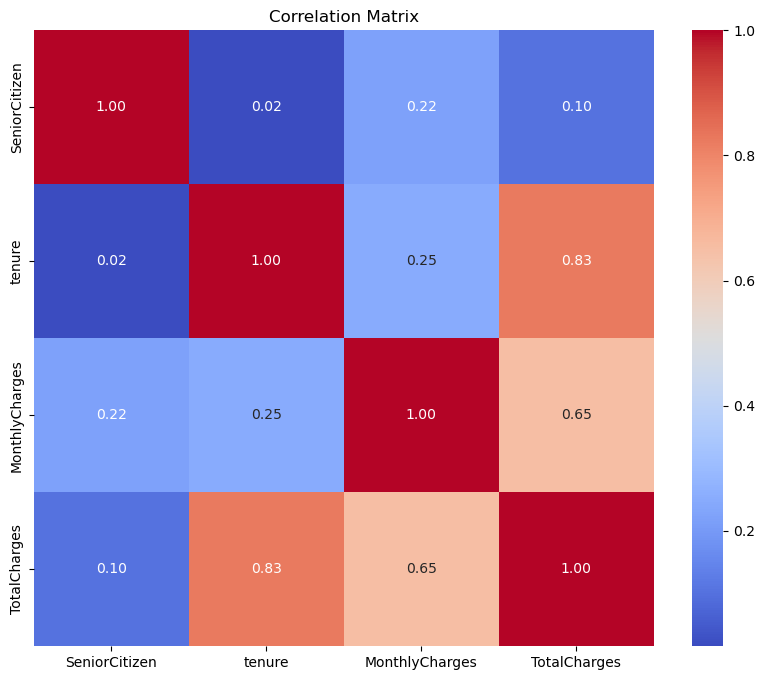

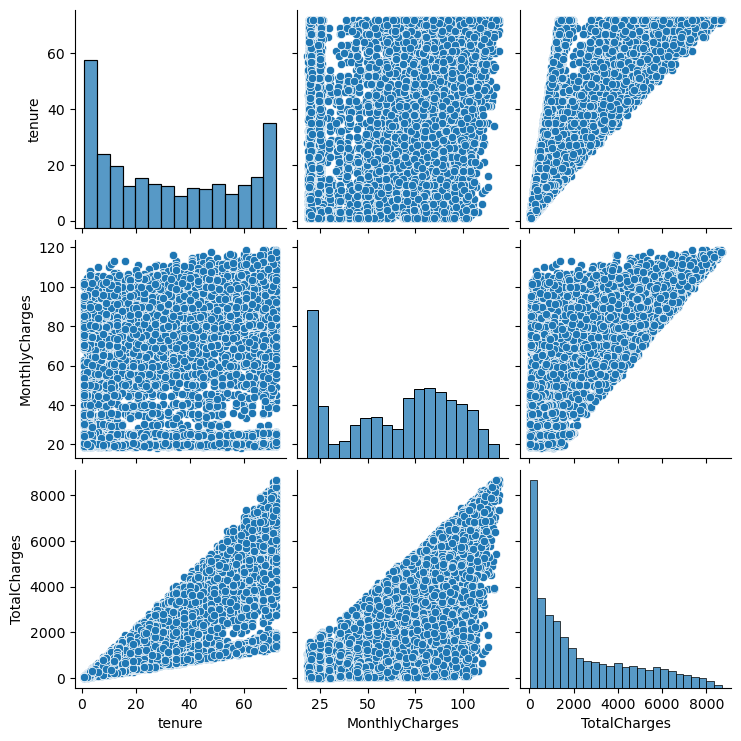

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset

df = pd.read_csv(r"C:\Users\spriy\Downloads\WA_Fn_UseC_Telco_Customer_Churn.csv")

# Display basic information about the dataset
display(df.head())
display(df.info())

def data_cleaning(df):
    """Performs data cleaning including handling missing values, duplicates, and outliers."""
    
    # Handling missing values
    df.replace(" ", np.nan, inplace=True)  # Replace blanks with NaN
    df.dropna(inplace=True)  # Drop rows with missing values
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Convert TotalCharges to numeric
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
    
    # Outlier detection using Z-score method
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]  # Remove extreme outliers
    
    return df

df_cleaned = data_cleaning(df)
display(df_cleaned.describe())

# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['tenure'], bins=30, kde=True)
plt.title("Distribution of Tenure")
plt.show()

# Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df_cleaned)
plt.title("Tenure vs Monthly Charges")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Multivariate Analysis
sns.pairplot(df_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()
